# Week 9 Lab - Mobile Health Monitoring
Duration: 30-45 minutes

## Project overview

Build a Mobile Health Monitoring System that simulates patient vital signs, detects health anomalies, and provides personalized health recommendations. Each task builds upon the previous one to create a comprehensive mHealth application.

Final Deliverable: A Python-based health monitor that tracks multiple vital signs, detects anomalies, and generates personalized health insights. Please refer to the “Lab Submission” section at the end of this document for detailed deliverables and reporting instruction

In [16]:
# Setup
#!pip install numpy matplotlib scipy pandas seaborn


In [17]:
# For gui
import matplotlib
#matplotlib.use('TkAgg')      
%matplotlib inline          

### Task 1 Vital signs monitoring foundation (15 mins)
Build a multi-sensor health data collection and basic anomaly detection

🏥 Simulating 24h health monitoring for P001...
✅ Generated 24 health data points


/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/4165571096.py:272: UserWarning: Glyph 128147 (\N{BEATING HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/4165571096.py:272: UserWarning: Glyph 129656 (\N{DROP OF BLOOD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/4165571096.py:272: UserWarning: Glyph 129729 (\N{LUNGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/4165571096.py:272: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/4165571096.py:272: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/4165

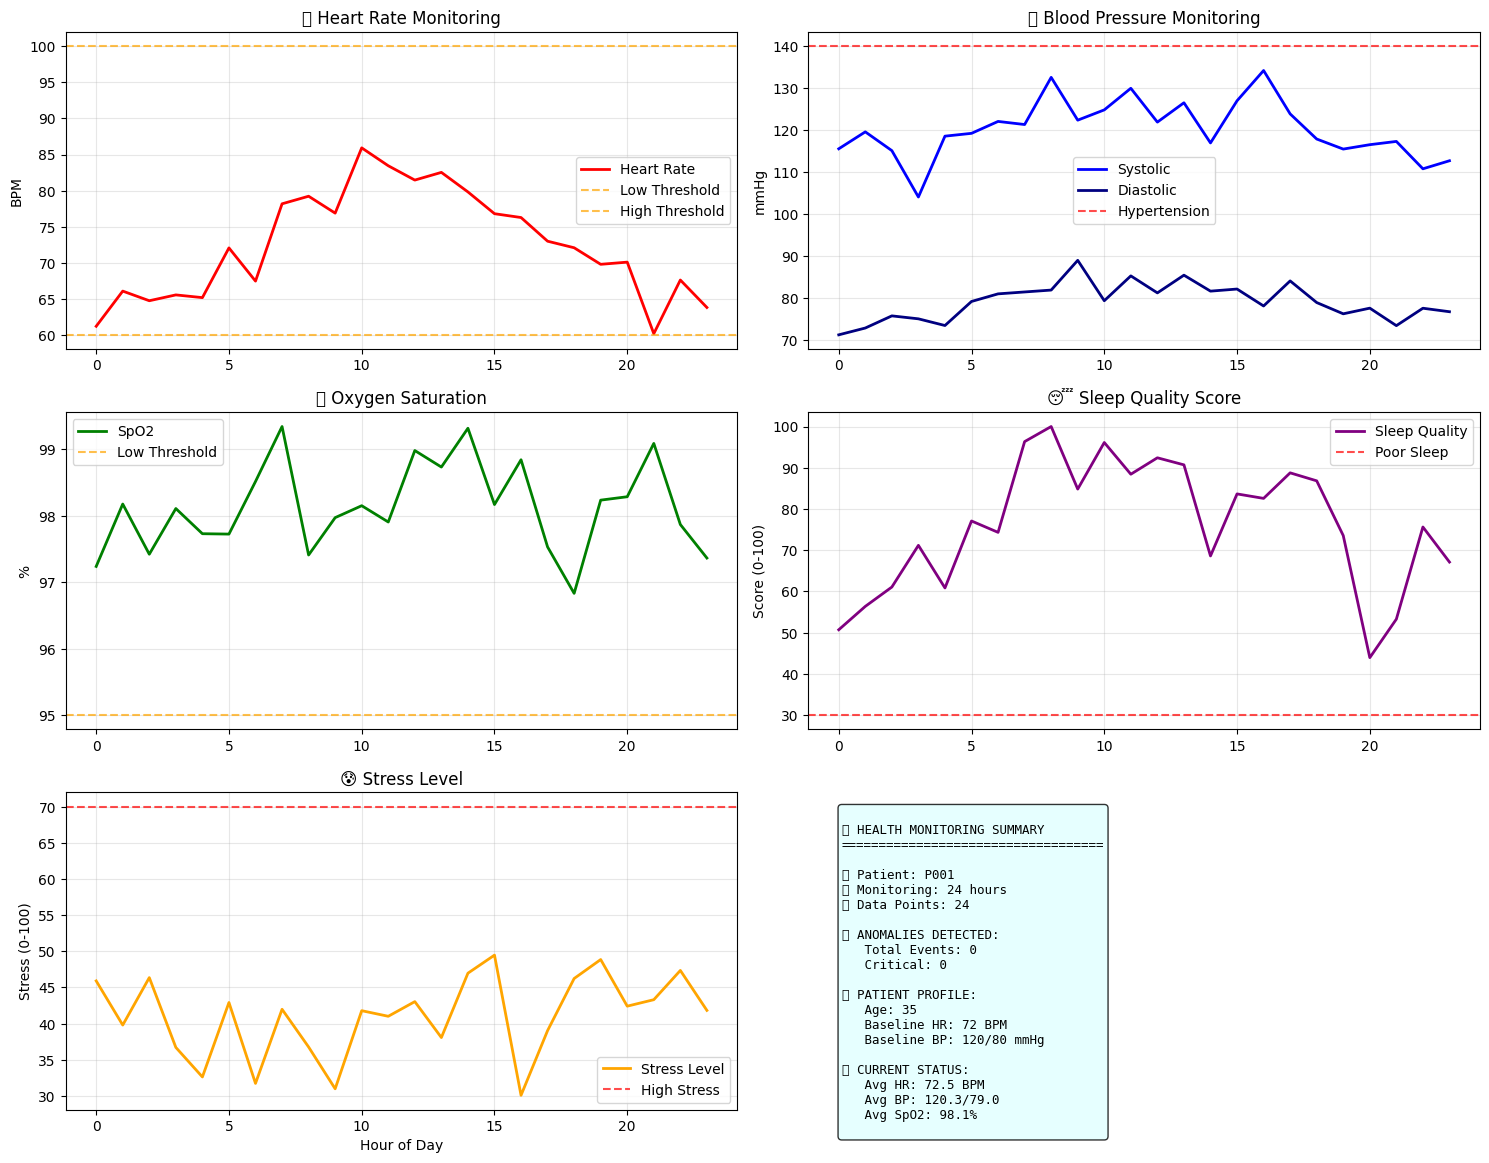

🏥 Health Monitoring Results:
   📊 Processed 24 data points over 24 hours
   🚨 Detected 0 anomalous events
   ⚠️  Critical anomalies: 0


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from datetime import datetime, timedelta
import seaborn as sns

class MobileHealthSimulator:
    """
    Simulates smartphone-based health monitoring data with realistic physiological patterns.
    
    """

    def __init__(self, patient_id="P001", sample_rate=1):
        """
        Initialize the health simulator with patient information.
        
        """
        #  Input validation to ensure proper types
        if not isinstance(patient_id, str) or not patient_id:
            raise ValueError("patient_id must be a non-empty string")
        if not isinstance(sample_rate, (int, float)) or sample_rate <= 0:
            raise ValueError("sample_rate must be a positive number")
        
        self.patient_id = patient_id
        self.sample_rate = sample_rate
        self.health_data = {}
        self.timestamps = []
        
        
        self.patient_profile = {
            'age': 35,                    # Patient age in years
            'gender': 'M',                # Patient gender (M/F)
            'baseline_hr': 72,            # Normal resting heart rate (BPM)
            'baseline_bp_sys': 120,       # Normal systolic BP (mmHg)
            'baseline_bp_dia': 80,        # Normal diastolic BP (mmHg)
            'stress_level': 0.3           # Baseline stress level (0-1 scale)
        }

    def simulate_health_session(self, duration_hours=24):
        """
        Simulate realistic 24-hour health monitoring data 
    
        """
        #  Input validation for duration 
        if not isinstance(duration_hours, (int, float)) or duration_hours <= 0:
            raise ValueError("duration_hours must be a positive number")
        if duration_hours > 168:  # More than a week
            raise ValueError("duration_hours should not exceed 168 (1 week)")
        
        print(f"🏥 Simulating {duration_hours}h health monitoring for {self.patient_id}...")

        # Time series (hourly samples)
        total_samples = int(duration_hours * 60 / 60 * self.sample_rate)  # hourly data points
        t = np.linspace(0, duration_hours, total_samples)

        # Extract baseline values from patient profile
        base_hr = self.patient_profile['baseline_hr']      # Baseline heart rate
        base_sys = self.patient_profile['baseline_bp_sys']  # Baseline systolic BP
        base_dia = self.patient_profile['baseline_bp_dia']  # Baseline diastolic BP
        stress = self.patient_profile['stress_level']       # Patient stress factor

        circadian_hr = 10 * np.sin(2 * np.pi * t / 24 - np.pi/2)  # ±10 BPM variation
        
        # Stress-induced spikes: Random elevations throughout the day
        stress_spikes = stress * 15 * np.random.exponential(0.1, len(t))  
        
        # Combine components with random noise for realism
        heart_rate = base_hr + circadian_hr + stress_spikes + np.random.normal(0, 3, len(t))
        heart_rate = np.clip(heart_rate, 50, 150)  # Adult physiological range
        circadian_bp = 8 * np.sin(2 * np.pi * t / 24 - np.pi/2)  # ±8 mmHg variation
        
        # Systolic BP
        bp_systolic = base_sys + circadian_bp + stress * 10 * np.random.exponential(0.1, len(t)) + np.random.normal(0, 5, len(t))
        
        # Diastolic BP
        bp_diastolic = base_dia + circadian_bp * 0.6 + stress * 6 * np.random.exponential(0.1, len(t)) + np.random.normal(0, 3, len(t))

        spo2_base = 98  # Normal oxygen saturation is 95-100%
        spo2 = spo2_base + np.random.normal(0, 0.8, len(t))  # Minor variations
        spo2 = np.clip(spo2, 92, 100)  # Physiological limits for SpO2
        sleep_pattern = 50 + 40 * np.abs(np.sin(np.pi * t / 24))  # Peak at midnight
        sleep_quality = sleep_pattern + np.random.normal(0, 10, len(t))
        sleep_quality = np.clip(sleep_quality, 0, 100)  # 0-100 scale

        # Store data
        start_time = datetime.now()
        self.timestamps = [start_time + timedelta(hours=i) for i in t]
        self.health_data = {
            'heart_rate': heart_rate,           # Beats per minute (BPM)
            'bp_systolic': bp_systolic,         # Systolic BP in mmHg
            'bp_diastolic': bp_diastolic,       # Diastolic BP in mmHg
            'spo2': spo2,                       # Oxygen saturation (%)
            'sleep_quality': sleep_quality,     # Sleep score (0-100)
            'stress_level': stress * 100 + 20 * np.random.random(len(t))  # Stress (0-100)
        }

        print(f"✅ Generated {len(t)} health data points")
        return len(t)

class HealthAnomalyDetector:
    """
    Detects health anomalies using clinical threshold-based analysis.
    """

    def __init__(self):
        # clinical thresholds for anomaly detection
        self.thresholds = {
            'heart_rate': {
                'low': 60,              # Bradycardia threshold (BPM)
                'high': 100,            # Tachycardia threshold (BPM)
                'critical_low': 50,     # Severe bradycardia 
                'critical_high': 120    # Severe tachycardia 
            },
            'bp_systolic': {
                'low': 90,              # Hypotension threshold (mmHg)
                'high': 140,            # Hypertension stage 1 (mmHg)
                'critical_low': 80,     # Severe hypotension (mmHg)
                'critical_high': 180    # Hypertensive crisis (mmHg)
            },
            'bp_diastolic': {
                'low': 60,              # Diastolic hypotension (mmHg)
                'high': 90,             # Diastolic hypertension (mmHg)
                'critical_low': 50,     # Severe diastolic hypotension (mmHg)
                'critical_high': 110    # Severe diastolic hypertension (mmHg)
            },
            'spo2': {
                'low': 95,              # Below optimal oxygen saturation (%)
                'critical_low': 90      # Hypoxemia threshold (%)
            },
            'sleep_quality': {
                'low': 30               # Poor sleep quality threshold
            },
            'stress_level': {
                'high': 70,             # Elevated stress level
                'critical_high': 85     # Severe stress requiring intervention
            }
        }
        self.anomalies = []

    def detect_anomalies(self, health_data, timestamps):
        """
        Detect health anomalies based on clinical thresholds.
        """
        # Input validation for robustness 
        if not health_data or not timestamps:
            raise ValueError("health_data and timestamps cannot be empty")
        if len(timestamps) != len(next(iter(health_data.values()))):
            raise ValueError("timestamps and health_data lengths must match")
        
        anomalies = []

        for i, timestamp in enumerate(timestamps):
            current_anomalies = []

            # Check each vital sign against thresholds
            for vital, values in health_data.items():
                if vital in self.thresholds:
                    value = values[i]
                    thresholds = self.thresholds[vital]

                    if 'critical_high' in thresholds and value > thresholds['critical_high']:
                        current_anomalies.append((vital, value, 'critical_high'))
                    elif 'critical_low' in thresholds and value < thresholds['critical_low']:
                        current_anomalies.append((vital, value, 'critical_low'))
                    elif 'high' in thresholds and value > thresholds['high']:
                        current_anomalies.append((vital, value, 'high'))
                    elif 'low' in thresholds and value < thresholds['low']:
                        current_anomalies.append((vital, value, 'low'))
            if current_anomalies:
                anomalies.append({
                    'timestamp': timestamp,
                    'anomalies': current_anomalies
                })

        self.anomalies = anomalies
        return anomalies


# Initialize and test health monitoring
health_sim = MobileHealthSimulator(patient_id="P001")
data_points = health_sim.simulate_health_session(duration_hours=24)

# Detect anomalies
anomaly_detector = HealthAnomalyDetector()
detected_anomalies = anomaly_detector.detect_anomalies(health_sim.health_data, health_sim.timestamps)

# visualize vital signs and monitoring 
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
hours = [i for i in range(24)]

# heart rate
axes[0,0].plot(hours, health_sim.health_data['heart_rate'], 'red', linewidth=2, label='Heart Rate')
axes[0,0].axhline(y=60, color='orange', linestyle='--', alpha=0.7, label='Low Threshold')
axes[0,0].axhline(y=100, color='orange', linestyle='--', alpha=0.7, label='High Threshold')
axes[0,0].set_title('💓 Heart Rate Monitoring')
axes[0,0].set_ylabel('BPM')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Blood Pressure
axes[0,1].plot(hours, health_sim.health_data['bp_systolic'], 'blue', linewidth=2, label='Systolic')
axes[0,1].plot(hours, health_sim.health_data['bp_diastolic'], 'navy', linewidth=2, label='Diastolic')
axes[0,1].axhline(y=140, color='red', linestyle='--', alpha=0.7, label='Hypertension')
axes[0,1].set_title('🩸 Blood Pressure Monitoring')
axes[0,1].set_ylabel('mmHg')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)


# SpO2
axes[1,0].plot(hours, health_sim.health_data['spo2'], 'green', linewidth=2, label='SpO2')
axes[1,0].axhline(y=95, color='orange', linestyle='--', alpha=0.7, label='Low Threshold')
axes[1,0].set_title('🫁 Oxygen Saturation')
axes[1,0].set_ylabel('%')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Sleep Quality
axes[1,1].plot(hours, health_sim.health_data['sleep_quality'], 'purple', linewidth=2, label='Sleep Quality')
axes[1,1].axhline(y=30, color='red', linestyle='--', alpha=0.7, label='Poor Sleep')
axes[1,1].set_title('😴 Sleep Quality Score')
axes[1,1].set_ylabel('Score (0-100)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Stress Level
axes[2,0].plot(hours, health_sim.health_data['stress_level'], 'orange', linewidth=2, label='Stress Level')
axes[2,0].axhline(y=70, color='red', linestyle='--', alpha=0.7, label='High Stress')
axes[2,0].set_title('😰 Stress Level')
axes[2,0].set_xlabel('Hour of Day')
axes[2,0].set_ylabel('Stress (0-100)')
axes[2,0].legend()
axes[2,0].grid(True, alpha=0.3)

# Anomaly Summary
anomaly_count = len(detected_anomalies)
total_critical = sum(1 for a in detected_anomalies 
                    for _, _, severity in a['anomalies'] 
                    if 'critical' in severity)

summary_text = f"""
📱 HEALTH MONITORING SUMMARY
{'='*35}

👤 Patient: {health_sim.patient_id}
⏰ Monitoring: 24 hours
📊 Data Points: {data_points}

🚨 ANOMALIES DETECTED:
   Total Events: {anomaly_count}
   Critical: {total_critical}

🏥 PATIENT PROFILE:
   Age: {health_sim.patient_profile['age']}
   Baseline HR: {health_sim.patient_profile['baseline_hr']} BPM
   Baseline BP: {health_sim.patient_profile['baseline_bp_sys']}/{health_sim.patient_profile['baseline_bp_dia']} mmHg

📈 CURRENT STATUS:
   Avg HR: {np.mean(health_sim.health_data['heart_rate']):.1f} BPM
   Avg BP: {np.mean(health_sim.health_data['bp_systolic']):.1f}/{np.mean(health_sim.health_data['bp_diastolic']):.1f}
   Avg SpO2: {np.mean(health_sim.health_data['spo2']):.1f}%
"""

axes[2,1].text(0.05, 0.95, summary_text, transform=axes[2,1].transAxes, fontsize=9,
               verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))
axes[2,1].set_xlim(0, 1)
axes[2,1].set_ylim(0, 1)
axes[2,1].axis('off')

plt.tight_layout()
plt.show()

print(f"🏥 Health Monitoring Results:")
print(f"   📊 Processed {data_points} data points over 24 hours")
print(f"   🚨 Detected {anomaly_count} anomalous events")
print(f"   ⚠️  Critical anomalies: {total_critical}")
if detected_anomalies:
    print(f"   🕐 First anomaly at: {detected_anomalies[0]['timestamp'].strftime('%H:%M')}")

### Task 2 Personalized Health Insights & Recomendations (15-20 mins)
Add intelligent health analytics and personalized recommendations

/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/529371778.py:421: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/529371778.py:421: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/529371778.py:421: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/529371778.py:421: UserWarning: Glyph 128175 (\N{HUNDRED POINTS SYMBOL}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_59710/529371778.py:421: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipy

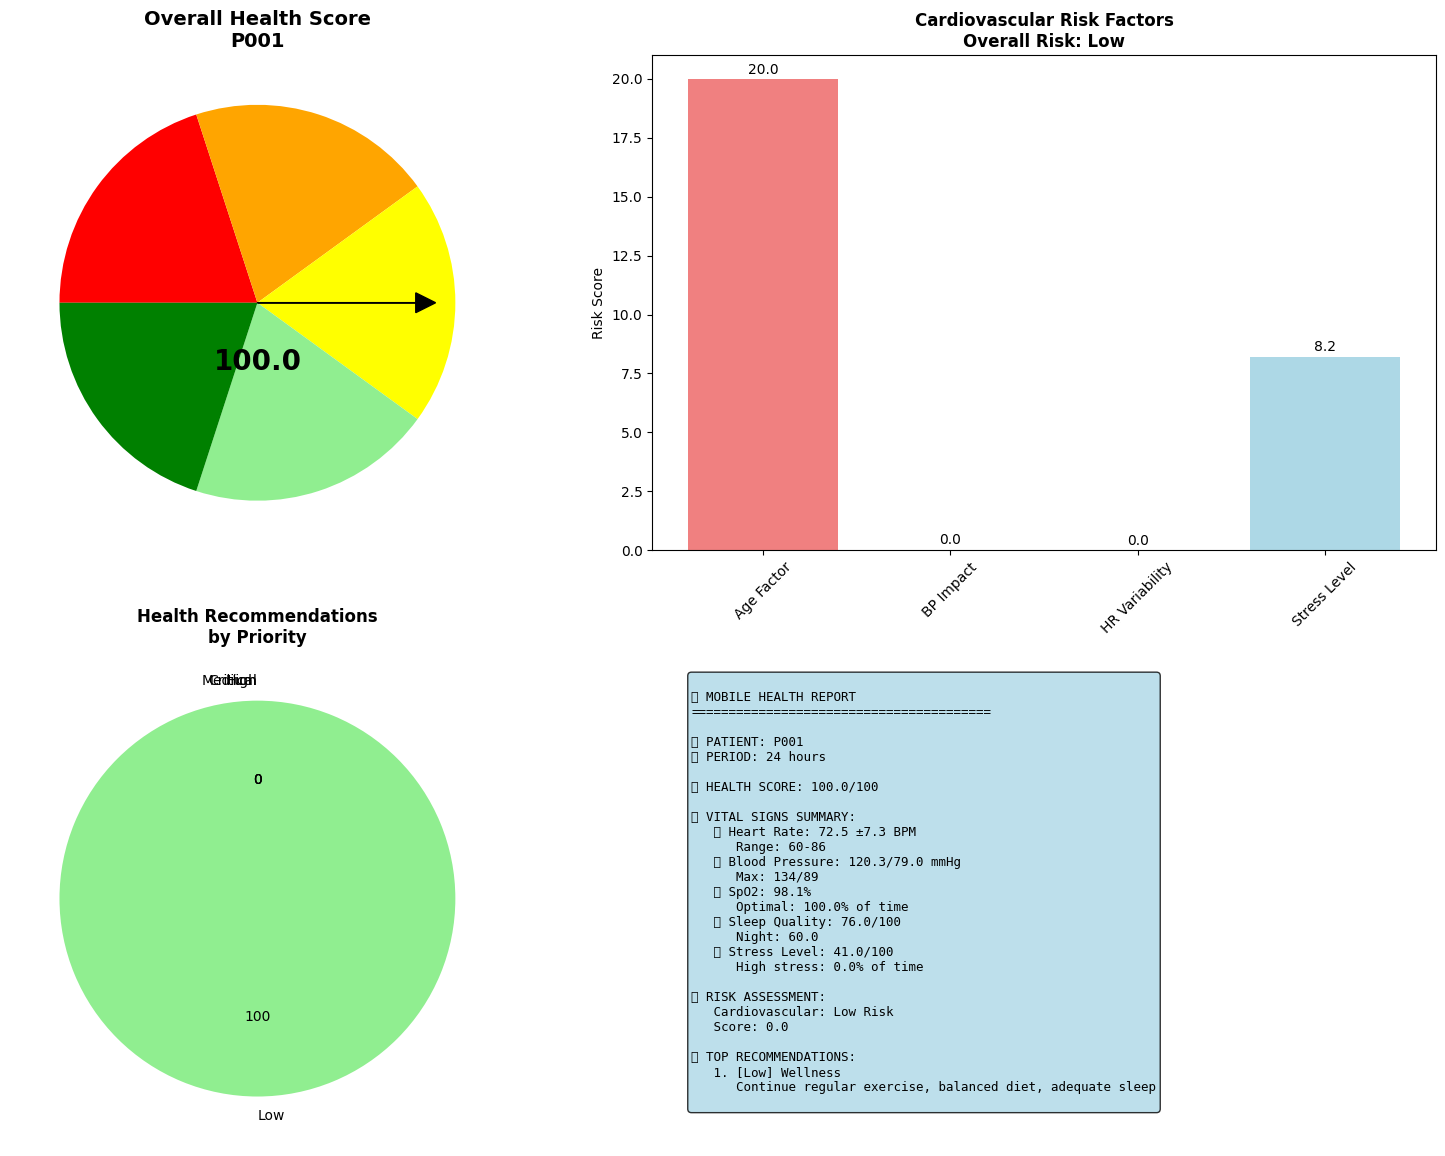


🎉 MOBILE HEALTH SYSTEM COMPLETE!
✅ Monitored 24 health data points
✅ Calculated health score: 100.0/100
✅ Assessed cardiovascular risk: Low
✅ Generated 1 personalized recommendations
✅ Created comprehensive health analytics dashboard

🎯 KEY RECOMMENDATIONS:
   1. [Low] Overall health is good - maintain current lifestyle
      → Continue regular exercise, balanced diet, adequate sleep


In [19]:
class HealthAnalytics:
    """
    Advanced health analytics and personalized recommendation 
    """

    def __init__(self, patient_profile):
        """
        Initialize the health analytics system with patient profile.

        """
        # Validate patient profile structure 
        if not isinstance(patient_profile, dict):
            raise TypeError("patient_profile must be a dictionary")
        required_keys = ['age', 'baseline_hr', 'baseline_bp_sys', 'baseline_bp_dia']
        for key in required_keys:
            if key not in patient_profile:
                raise ValueError(f"patient_profile missing required key: {key}")
        
        self.patient_profile = patient_profile
        self.health_score = 0
        self.recommendations = []
        self.risk_assessment = {}

    def calculate_health_score(self, health_data, anomalies):
        """ Calculate overall health score (0-100) """
        # Penalize based on anomalies 
        # Input validation 
        if not health_data:
            raise ValueError("health_data cannot be empty")
        if not isinstance(anomalies, list):
            raise TypeError("anomalies must be a list")
        
        base_score = 100  # Perfect health baseline

        anomaly_penalty = len(anomalies) * 5
        
        # Critical anomalies: Additional -15 points (total -20)
        critical_penalty = sum(15 for a in anomalies 
                             for _, _, severity in a['anomalies'] 
                             if 'critical' in severity)


        # Lower standard deviation = more stable = healthier
        hr_stability = 100 - np.std(health_data['heart_rate'])  # HR stability score
        bp_stability = 100 - np.std(health_data['bp_systolic'])  # BP stability score
        
        # SpO2 stability: Penalize deviation from 100% saturation
        spo2_stability = 100 - (100 - np.mean(health_data['spo2'])) * 10
        

        stability_bonus = (hr_stability + bp_stability + spo2_stability) / 30

        # Calculate final score 
        self.health_score = max(0, min(100, 
            base_score - anomaly_penalty - critical_penalty + stability_bonus))

        return self.health_score

    def assess_cardiovascular_risk(self, health_data):
        """
        Assess cardiovascular risk based on multiple factors"""
        
        # Input validation 
        if not health_data:
            raise ValueError("health_data cannot be empty")
        
        # Extract patient demographics and vital statistics
        age = self.patient_profile['age']
        avg_hr = np.mean(health_data['heart_rate'])
        avg_sys = np.mean(health_data['bp_systolic'])
        avg_stress = np.mean(health_data['stress_level'])

        # Risk scoring (simplified clinical model)
        risk_score = 0

        # Age factor
        if age > 45:
            risk_score += (age - 45) * 0.5

        # Blood pressure factor
        if avg_sys > 140:
            # Stage 2 hypertension: Higher risk
            risk_score += (avg_sys - 140) * 0.3
        elif avg_sys > 120:
            # Elevated/Stage 1: Moderate risk
            risk_score += (avg_sys - 120) * 0.1

        # Heart rate variability
        hr_var = np.std(health_data['heart_rate'])
        if hr_var > 15:
            risk_score += (hr_var - 15) * 0.2

        # Stress factor
        if avg_stress > 60:
            risk_score += (avg_stress - 60) * 0.1

        # Categorize risk
        if risk_score < 5:
            risk_level = "Low"
        elif risk_score < 15:
            risk_level = "Moderate"
        else:
            risk_level = "High"

        self.risk_assessment = {
            'cardiovascular': {
                'score': risk_score,
                'level': risk_level,
                'factors': {
                    'age': age,
                    'avg_systolic': avg_sys,
                    'hr_variability': hr_var,
                    'stress_level': avg_stress
                }
            }
        }

        return self.risk_assessment

    def generate_recommendations(self, health_data, anomalies):
        """Generate personalized health recommendations"""
        # Input validation 
        if not health_data:
            raise ValueError("health_data cannot be empty")
        
        recommendations = []

        # Heart rate recommendations
        avg_hr = np.mean(health_data['heart_rate'])
        
        if avg_hr > 100:
            # Tachycardia detected
            recommendations.append({
                'category': 'Cardiovascular',
                'priority': 'High',
                'recommendation': 'Consider stress reduction techniques and consult physician about elevated heart rate',
                'action': 'Practice deep breathing exercises 3x daily'
            })
        elif avg_hr < 60:
            # Bradycardia detected
            recommendations.append({
                'category': 'Cardiovascular',
                'priority': 'Medium',
                'recommendation': 'Monitor for symptoms of bradycardia',
                'action': 'Track energy levels and dizziness episodes'
            })

        # Blood pressure recommendations
        avg_sys = np.mean(health_data['bp_systolic'])
        
        if avg_sys > 140:
            # Hypertension stage 2
            recommendations.append({
                'category': 'Hypertension',
                'priority': 'High',
                'recommendation': 'Lifestyle modifications needed to reduce blood pressure',
                'action': 'Reduce sodium intake, increase exercise, consider medical consultation'
            })
        # Additional BP category for elevated readings 
        elif avg_sys > 130:
            recommendations.append({
                'category': 'Hypertension',
                'priority': 'Medium',
                'recommendation': 'Elevated blood pressure detected - preventive measures recommended',
                'action': 'Implement DASH diet, regular aerobic exercise 30min daily'
            })

        # Sleep recommendations
        avg_sleep = np.mean(health_data['sleep_quality'])
        
        if avg_sleep < 40:
            recommendations.append({
                'category': 'Sleep Health',
                'priority': 'Medium',
                'recommendation': 'Improve sleep hygiene for better recovery',
                'action': 'Maintain consistent bedtime, limit screen time before sleep'
            })
        # Additional sleep improvement suggestions 
        elif avg_sleep < 60:
            recommendations.append({
                'category': 'Sleep Health',
                'priority': 'Low',
                'recommendation': 'Sleep quality could be improved',
                'action': 'Optimize bedroom temperature (60-67°F), avoid caffeine after 2pm'
            })

        # Stress management
        avg_stress = np.mean(health_data['stress_level'])
        
        if avg_stress > 70:
            recommendations.append({
                'category': 'Mental Health',
                'priority': 'High',
                'recommendation': 'High stress levels detected - implement stress management',
                'action': 'Try meditation apps, regular exercise, consider counseling'
            })
        # Moderate stress management 
        elif avg_stress > 50:
            recommendations.append({
                'category': 'Mental Health',
                'priority': 'Medium',
                'recommendation': 'Moderate stress levels - proactive management recommended',
                'action': 'Practice mindfulness 10min daily, engage in relaxing activities'
            })

        # Critical anomaly recommendations
        critical_anomalies = [a for a in anomalies 
                            for _, _, severity in a['anomalies'] 
                            if 'critical' in severity]
        
        if critical_anomalies:
            recommendations.append({
                'category': 'Emergency',
                'priority': 'Critical',
                'recommendation': 'Critical vital signs detected - seek immediate medical attention',
                'action': 'Contact healthcare provider or emergency services'
            })

        # Activity recommendation based on overall health 
        if avg_hr < 80 and avg_sys < 130 and avg_stress < 50:
            recommendations.append({
                'category': 'Wellness',
                'priority': 'Low',
                'recommendation': 'Overall health is good - maintain current lifestyle',
                'action': 'Continue regular exercise, balanced diet, adequate sleep'
            })

        self.recommendations = recommendations
        return recommendations

class HealthReportGenerator:
    """Generate comprehensive health reports"""

    def __init__(self, patient_profile, health_data, analytics):
        """
        Initialize the report generator with patient data and analytics.

        """
        # Validate all inputs 
        if not isinstance(patient_profile, dict):
            raise TypeError("patient_profile must be a dictionary")
        if not isinstance(health_data, dict):
            raise TypeError("health_data must be a dictionary")
        if not isinstance(analytics, HealthAnalytics):
            raise TypeError("analytics must be a HealthAnalytics instance")
        
        self.patient_profile = patient_profile
        self.health_data = health_data
        self.analytics = analytics

    def generate_daily_report(self):
        """Generate daily health summary report """
    
        # Calculate comprehensive statistics for all vital signs 
        report = {
            'patient_id': 'P001',  # Patient identifier
            'patient_info': self.patient_profile,
            'monitoring_period': '24 hours',
            
            # Vital signs summary with advanced metrics
            'vital_signs_summary': {
                'heart_rate': {
                    'avg': np.mean(self.health_data['heart_rate']),      # Average HR
                    'min': np.min(self.health_data['heart_rate']),       # Minimum HR
                    'max': np.max(self.health_data['heart_rate']),       # Maximum HR
                    'std': np.std(self.health_data['heart_rate'])        # HR variability
                },
                'blood_pressure': {
                    'avg_systolic': np.mean(self.health_data['bp_systolic']),
                    'avg_diastolic': np.mean(self.health_data['bp_diastolic']),
                    'max_systolic': np.max(self.health_data['bp_systolic']),
                    'max_diastolic': np.max(self.health_data['bp_diastolic']),
                    #  BP variability metrics 
                    'std_systolic': np.std(self.health_data['bp_systolic']),
                    'std_diastolic': np.std(self.health_data['bp_diastolic'])
                },
                'oxygen_saturation': {
                    'avg': np.mean(self.health_data['spo2']),
                    'min': np.min(self.health_data['spo2']),
                    # Percentage of time in optimal range 
                    'optimal_pct': np.sum(self.health_data['spo2'] >= 95) / len(self.health_data['spo2']) * 100
                },
                'sleep_quality': {
                    'avg': np.mean(self.health_data['sleep_quality']),
                    #  Night hours sleep quality (last 4 hours) 
                    'night_hours': np.mean(self.health_data['sleep_quality'][20:]),
                    #: Day hours sleep quality 
                    'day_hours': np.mean(self.health_data['sleep_quality'][:12])
                },
                'stress_level': {
                    'avg': np.mean(self.health_data['stress_level']),
                    'max': np.max(self.health_data['stress_level']),
                    # Percentage of time in high stress
                    'high_stress_pct': np.sum(self.health_data['stress_level'] > 70) / len(self.health_data['stress_level']) * 100
                }
            },
            'health_score': self.analytics.health_score,
            'risk_assessment': self.analytics.risk_assessment,
            'recommendations': self.analytics.recommendations
        }

        return report

# Perform advanced health analytics
analytics = HealthAnalytics(health_sim.patient_profile)

# Calculate health score with penalty/reward system 
health_score = analytics.calculate_health_score(health_sim.health_data, detected_anomalies)

# Multi-factor cardiovascular risk assessment 
risk_assessment = analytics.assess_cardiovascular_risk(health_sim.health_data)

# Generate context-aware personalized recommendations 
recommendations = analytics.generate_recommendations(health_sim.health_data, detected_anomalies)

# Generate comprehensive report
report_generator = HealthReportGenerator(health_sim.patient_profile, health_sim.health_data, analytics)
daily_report = report_generator.generate_daily_report()

# Visualize health analytics dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Health Score Gauge
def create_gauge(ax, score, title):
    """Create a gauge chart for health score"""
    # Color zones: red (0-20), orange (20-40), yellow (40-60), light green (60-80), green (80-100)
    colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']
    sectors = [20, 20, 20, 20, 20]  # Equal 20-point sectors

    # Create semi-circular gauge using pie chart
    wedges, texts = ax.pie(sectors, colors=colors, startangle=180, counterclock=False)

    # Add needle indicator pointing to current score 
    angle = 180 - (score / 100) * 180  # Convert score to angle
    needle_x = 0.8 * np.cos(np.radians(angle))
    needle_y = 0.8 * np.sin(np.radians(angle))
    ax.arrow(0, 0, needle_x, needle_y, head_width=0.1, head_length=0.1, fc='black', ec='black')

    ax.text(0, -0.3, f'{score:.1f}', ha='center', va='center', fontsize=20, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')

create_gauge(ax1, health_score, f'Overall Health Score\n{health_sim.patient_id}')

# 2. Risk Assesment
risk_data = risk_assessment['cardiovascular']
risk_categories = ['Age Factor', 'BP Impact', 'HR Variability', 'Stress Level']

risk_values = [
    min(risk_data['factors']['age'], 20),                          # Age contribution (capped at 20)
    max(0, risk_data['factors']['avg_systolic'] - 120) * 0.1,     # BP contribution
    max(0, risk_data['factors']['hr_variability'] - 10),          # HRV contribution
    risk_data['factors']['stress_level'] * 0.2                     # Stress contribution
]

bars = ax2.bar(risk_categories, risk_values, color=['lightcoral', 'orange', 'gold', 'lightblue'])
ax2.set_title(f'Cardiovascular Risk Factors\nOverall Risk: {risk_data["level"]}', fontweight='bold')
ax2.set_ylabel('Risk Score')
ax2.tick_params(axis='x', rotation=45)

for bar, value in zip(bars, risk_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.1f}', ha='center', va='bottom')

# 3. Recommendations Priority Chart
if recommendations:
    priorities = [r['priority'] for r in recommendations]
    priority_counts = {p: priorities.count(p) for p in ['Critical', 'High', 'Medium', 'Low']}
    priority_colors = {'Critical': 'red', 'High': 'orange', 'Medium': 'yellow', 'Low': 'lightgreen'}

    wedges, texts, autotexts = ax3.pie([priority_counts.get(p, 0) for p in priority_colors.keys()], 
                                      labels=priority_colors.keys(),
                                      colors=priority_colors.values(),
                                      autopct='%1.0f',
                                      startangle=90)
    ax3.set_title('Health Recommendations\nby Priority', fontweight='bold')
else:
    ax3.text(0.5, 0.5, 'No Recommendations\nAll Vitals Normal', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('Health Recommendations', fontweight='bold')

# 4. Detailed Health Report
report_text = f"""
📱 MOBILE HEALTH REPORT
{'='*40}

👤 PATIENT: {daily_report['patient_id']}
📅 PERIOD: {daily_report['monitoring_period']}

💯 HEALTH SCORE: {daily_report['health_score']:.1f}/100

📊 VITAL SIGNS SUMMARY:
   💓 Heart Rate: {daily_report['vital_signs_summary']['heart_rate']['avg']:.1f} ±{daily_report['vital_signs_summary']['heart_rate']['std']:.1f} BPM
      Range: {daily_report['vital_signs_summary']['heart_rate']['min']:.0f}-{daily_report['vital_signs_summary']['heart_rate']['max']:.0f}
   🩸 Blood Pressure: {daily_report['vital_signs_summary']['blood_pressure']['avg_systolic']:.1f}/{daily_report['vital_signs_summary']['blood_pressure']['avg_diastolic']:.1f} mmHg
      Max: {daily_report['vital_signs_summary']['blood_pressure']['max_systolic']:.0f}/{daily_report['vital_signs_summary']['blood_pressure']['max_diastolic']:.0f}
   🫁 SpO2: {daily_report['vital_signs_summary']['oxygen_saturation']['avg']:.1f}%
      Optimal: {daily_report['vital_signs_summary']['oxygen_saturation']['optimal_pct']:.1f}% of time
   😴 Sleep Quality: {daily_report['vital_signs_summary']['sleep_quality']['avg']:.1f}/100
      Night: {daily_report['vital_signs_summary']['sleep_quality']['night_hours']:.1f}
   😰 Stress Level: {daily_report['vital_signs_summary']['stress_level']['avg']:.1f}/100
      High stress: {daily_report['vital_signs_summary']['stress_level']['high_stress_pct']:.1f}% of time

🚨 RISK ASSESSMENT:
   Cardiovascular: {risk_assessment['cardiovascular']['level']} Risk
   Score: {risk_assessment['cardiovascular']['score']:.1f}

🎯 TOP RECOMMENDATIONS:
"""

# Add top 3 recommendations
for i, rec in enumerate(recommendations[:3]):
    report_text += f"   {i+1}. [{rec['priority']}] {rec['category']}\n      {rec['action']}\n"

ax4.text(0.05, 0.95, report_text, transform=ax4.transAxes, fontsize=9,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')

plt.tight_layout()
plt.show()

print("\n🎉 MOBILE HEALTH SYSTEM COMPLETE!")
print("="*50)
print(f"✅ Monitored {data_points} health data points")
print(f"✅ Calculated health score: {health_score:.1f}/100")
print(f"✅ Assessed cardiovascular risk: {risk_assessment['cardiovascular']['level']}")
print(f"✅ Generated {len(recommendations)} personalized recommendations")
print(f"✅ Created comprehensive health analytics dashboard")

# Display key recommendations
print(f"\n🎯 KEY RECOMMENDATIONS:")
for i, rec in enumerate(recommendations[:3], 1):
    print(f"   {i}. [{rec['priority']}] {rec['recommendation']}")
    print(f"      → {rec['action']}")

## Discussion and Wrap up (5 mins)
What You Built:
1. Vital Signs Monitoring: Multi-sensor health data simulation and real-time tracking
2. Anomaly Detection: Clinical threshold-based health event detection
3. Health Analytics: Personalized health scoring and risk assessment
4. Smart Recommendations: AI-driven health insights and actionable advice
Real-World Impact:
- Chronic Disease Management: Foundation for diabetes, hypertension monitoring
- Preventive Healthcare: Early detection of health deterioration
- Telemedicine: Remote patient monitoring and consultation support
- Personal Wellness: Daily health optimization and lifestyle guidance
Key Concepts Demonstrated:
- Medical data simulation and processing
- Clinical decision support systems
- Health risk stratification algorithms
- Personalized medicine approaches
- Healthcare data visualization
mHealth Application Categories:
- Personal Care: Fitness tracking, nutrition monitoring
- Clinical Monitoring: Vital signs, chronic disease management
- Health Education: Patient information, medication reminders
- Social Health: Community support, health information sharing


### Lab submission 

Submit your Python script with generated visualizations and a brief summary (half-page) discussing:

1. How your anomaly detection could be improved with machine learning

The current threshold based system to detect anomalies uses the fixed clinical guidelines to flag the anomalies. This works well for detecting very obvious anomalies but has some limitations. Machine learning can enhance this system in many ways:

- 1: Supervised learning: These methods could be trained using labeled historical health data to learn the patterns that show the benign variations from true medical emergencies. They capture complex interactions between multiple vital signs at once (ex: high heart rate during exercise vs when sleeping) 
- 2: Recurrent Neural Networks: LSTM (Long short-term memory) networks are good at time-series predictions and could learn each patient's individual circadian patterns. Instead of population-wide based thresholds, the system would predict expected values from the time of day, recent activities, and historical trends. This ends up making anomaly detection pretty personalized. 
- 3: Unsupervised Learning: These algorithms can find anomalies without any labeled training data by learning the normal distribution of a patient's vitals. This is useful for detecting novel health events that are not in training datasets. 

Overall benefits of ML:
- Personalization: ML models adapt to the individual baselines vs using fixed thresholds.
- Context Aware: ML considers time based patterns, activity levels, and relationship between metrics. 
- Not as many false positives: By understanding the normal variation patterns, ML can distinguish between measurement noise and benign variations from the actual health.
- Models also improve with more data, becoming more accurate as time goes on. 


2. One privacy/security challenge in mobile health applications

One challenge is that unauthorized data access ends up leading to some protected health info breaches. Essentially this means risks associated with handling highly sensitive medical data. Unlike financial data where you can get a new credit card number, health info is permanent and personal because you can't change your genetic code. 

Specifically to the lab, mHealth apps always collect, transmit, and store sensitive health data such as vital signs, medications, behavior patterns, and even location info. This data goes through many points of vulnerability such as smartphones, wireless networks, cloud storage systems, and many others. Each transmission and storage point ends up being a security risk when unauthorized parties can access private health.

Risks can be: Identity theft/fraud, discrimination, medical safety, and many more. 

A potential mitigation could be end-end encryption, multi factor authentication, biometric access controls, and strict compliance/rules. 

3. One additional feature you'd add to enhance patient engagement

I would implement an intelligent gamification and social media-like system that takes the health monitoring from a passive data collection into a more engaging experience. 

Ideas:

- AI powered smart goals: This would generate personal goals/ health challenges based on someone's personal metrics and the clinical rules.
- Reward system: users can unlock achievements based off consistent meeting health goals and keeping streaks similar to fitbit.
- Social Network: Optional connections with family and friends to manage similar health conditions. Users can share their progress (with privacy controls), and have friendly competition or encouragement. This would very much help chronic disease patients connect to others facing similar feelings of isolation. 


This feature would not be too much using the existing tech: push notif systems, cloud bases for social media, data visualization libraries, and existing gamification frameworks from fitness apps. It would help provide social community support, while also making predictive insights to help patients get positive reinforced feedback.




## Mobile Health Monitoring System - Grading Rubric
Total Points: 100

Task 1: Vital Signs Monitoring (35 points)
MobileHealthSimulator class (17 pts)
Initialization and patient profile setup - 5 pts
simulate_health_session() with 24-hour data generation - 6 pts
Realistic vital signs with circadian rhythms (all 5 metrics) - 6 pts
HealthAnomalyDetector class (13 pts)
Clinical thresholds dictionary - 4 pts
detect_anomalies() method with severity classification - 6 pts
Proper anomaly storage and format - 3 pts
Visualization (5 pts)
Six-panel subplot with all vital signs - 3 pts
Summary statistics panel - 2 pts
Task 2: Health Analytics & Recommendations (35 points)
HealthAnalytics class (17 pts)
calculate_health_score() with penalties/rewards - 6 pts
assess_cardiovascular_risk() with multi-factor scoring - 6 pts
generate_recommendations() with context-aware advice - 5 pts
HealthReportGenerator class (10 pts)
Daily report structure with all sections - 6 pts
Statistical calculations - 4 pts
Advanced visualizations (8 pts)
Health score gauge - 2 pts
Risk assessment bar chart - 2 pts
Recommendations pie chart - 2 pts
Report text panel - 2 pts
Part 2: Code Quality (20 points)
Code organization (proper classes, methods, naming) - 8 pts
Documentation (docstrings, comments) - 6 pts
Robustness (validation, error handling) - 6 pts
Part 3: Written Summary (10 points)
Half-page summary addressing:

ML improvement for anomaly detection - 4 pts
Specific ML techniques identified - 2 pts
Explanation of improvements over threshold-based approach - 1 pts
Clarity and accuracy - 1 pts
Privacy/security challenge - 4 pts
Relevant challenge identified - 2 pts
Risks and implications explained - 1 pts
Understanding of healthcare data sensitivity - 1 pts
Additional engagement feature - 2 pts
Engagement enhancement explained - 1 pts
Feasibility and value - 1 pts
 

Congratulations! You've built a comprehensive mobile health monitoring system using core mHealth principles! 🎉